# <span style="color:darkblue"> Lecture 11: Application 1 - Linear Regression </span>

<font size = "5">

We will fit statistical models to data

- I will give an intro with minimal stats background
- See the optional lecture file for advanced users

The primary goal is to practice previous commands

# <span style="color:darkblue"> I. Import Libraries </span>


In [1]:
# The "pandas" library is used for processing datasets
# The "numpy" is for numeric observations and random numbers
# The "matplotlib.pyplot" library is for creating graphs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


<font size = "5">

Install the "statsmodels" library

```conda install statsmodels```

- In Windows, you can do this by opening the program  <br> "anaconda
prompt" and typing the above command.
- In Mac, you can open your terminal and <br>
type the above command

In [2]:
# We will "alias" two sublibraries in "statsmodels"
# "statsmodels.formula.api" contains functions to estimate models
# "statsmodels.api" contains general-use statistical options

import statsmodels.api as sm
import statsmodels.formula.api as smf


# <span style="color:darkblue"> II. Generate simulated Data </span>

<font size = "5">

Create an empty dataset

In [19]:
dataset = pd.DataFrame()

<font size = "5">

Create two random variables of size ($n = 50$)

In [30]:
n = 50
np.random.seed(42)
dataset["x"] = np.random.normal(loc = 0,scale = 1, size = n)
dataset["e"] = np.random.normal(loc = 0,scale = 1, size = n)
dataset

,x,e,y
0,0.496714,0.324084,2.317512
1,-0.138264,-0.385082,0.338389
2,0.647689,-0.676922,1.618455
3,1.523030,0.611676,4.657736
4,-0.234153,1.031000,1.562693
5,-0.234137,0.931280,1.463006
6,1.579213,-0.839218,3.319208
7,0.767435,-0.309212,2.225657
8,-0.469474,0.331263,0.392315
9,0.542560,0.975545,3.060665


<font size = "5">

Create data from the linear model

$ y = b_0 + b_1 x + e, \qquad b_0 = 1, b_1 = 2.$

In [41]:
# The number b0 is known as the "intercept"
# The number b1 is known as the "slope"

b0 = 1
b1 = 2

# We can compute formulas directly over dataset columns
dataset["y"] = b0 + b1 * dataset["x"] + dataset["e"]

In [32]:
dataset['y']

0     2.317512
1     0.338389
2     1.618455
3     4.657736
4     1.562693
5     1.463006
6     3.319208
7     2.225657
8     0.392315
9     3.060665
10   -0.406010
11   -0.117118
12    0.377590
13   -4.022767
14   -1.637310
15    1.231665
16   -1.097672
17    2.632028
18   -0.454412
19   -2.469727
20    4.292693
21    2.086484
22    1.099230
23   -0.284853
24   -2.708511
25    2.043748
26   -1.214940
27    1.452389
28   -0.109517
29   -1.570956
30   -0.423085
31    5.061669
32    2.450900
33   -1.633692
34    1.836596
35   -1.943444
36    2.333129
37   -2.590589
38   -2.186132
39    1.906990
40    2.574011
41    2.311382
42    0.066650
43    0.070130
44   -2.349152
45   -1.903203
46    0.374843
47    3.375300
48    1.692350
49   -2.760667
Name: y, dtype: float64

<font size = "5">

Compute the theoretically best fit line

$ p = b_0 + b_1 x$

In [40]:
dataset["p"] = b0 + b1*dataset["x"]

<font size = "5">

Plot the data

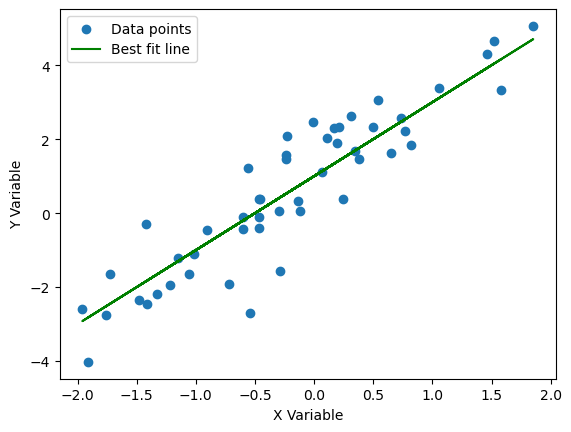

In [38]:
plt.scatter(x = dataset["x"], y = dataset["y"])
plt.plot(dataset["x"],dataset["p"], color = 'green')

plt.xlabel("X Variable")
plt.ylabel("Y Variable")
plt.legend(labels = ["Data points", "Best fit line"])
plt.show()


<font size = "5" >

Try it yourself

- Create a new dataset called $\quad$```subset_above2``` 
- Subset records with $y \ge 2$ using $\quad$```.query()```
- Count the original rows $\quad$ ```len(dataset)```
- Count the subsetted rows $\quad$ ```len(subset_above2)```
- Compute the proportion of subsetted observations


In [44]:
# Write your own code here
subset_above2 = dataset.query(" (y>2) ")
print(subset_above2)
print(len(dataset))  #50
print(len(subset_above2))  #15
proportion_above_2 = len(subset_above2)/len(dataset)
print(proportion_above_2)  #0.3
print(str(proportion_above_2*100) + "%")


           x         e         y         p
0   0.496714  0.324084  2.317512  1.993428
3   1.523030  0.611676  4.657736  4.046060
6   1.579213 -0.839218  3.319208  4.158426
7   0.767435 -0.309212  2.225657  2.534869
9   0.542560  0.975545  3.060665  2.085120
17  0.314247  1.003533  2.632028  1.628495
20  1.465649  0.361396  4.292693  3.931298
21 -0.225776  1.538037  2.086484  0.548447
25  0.110923  0.821903  2.043748  1.221845
31  1.852278  0.357113  5.061669  4.704556
32 -0.013497  1.477894  2.450900  0.973006
36  0.208864  0.915402  2.333129  1.417727
40  0.738467  0.097078  2.574011  2.476933
41  0.171368  0.968645  2.311382  1.342737
47  1.057122  0.261055  3.375300  3.114244
50
15
0.3
30.0%


<font size = "5">

Try it yourself!

- Store the sample mean of $y$ as $\quad$ ```ybar```
- Compute the standard deviation of $y$ $\quad$ ```stdv_sample```
- Use ```.query()``` to subset observations that satisfy

$ \qquad abs\left(y - ybar \right) \le stdv\_sample $

$\quad$ HINT: Use ```.mean()```,$\text{ }$ ```.std()``` <br>
$\quad$ HINT: Use the globals  $\ $ ```@xbar```,$\text{ }$ ```@stdv_sample```

In [49]:
# Note: abs(...) is the absolute value function
# Write your own code 
ybar = dataset["y"].mean()
stdv_sample = dataset["y"].std()
subset_2 = dataset.query("abs(y - @ybar) <= @stdv_sample") #use global variables because 
# dataset.query only works for variables in the dataset, so global must be used
print(ybar)
print(stdv_sample)
print(subset_2)
print(len(subset_2))

0.5668330599556721
2.147280451902935
           x         e         y         p
0   0.496714  0.324084  2.317512  1.993428
1  -0.138264 -0.385082  0.338389  0.723471
2   0.647689 -0.676922  1.618455  2.295377
4  -0.234153  1.031000  1.562693  0.531693
5  -0.234137  0.931280  1.463006  0.531726
7   0.767435 -0.309212  2.225657  2.534869
8  -0.469474  0.331263  0.392315  0.061051
10 -0.463418 -0.479174 -0.406010  0.073165
11 -0.465730 -0.185659 -0.117118  0.068540
12  0.241962 -1.106335  0.377590  1.483925
15 -0.562288  1.356240  1.231665 -0.124575
16 -1.012831 -0.072010 -1.097672 -1.025662
17  0.314247  1.003533  2.632028  1.628495
18 -0.908024  0.361636 -0.454412 -0.816048
21 -0.225776  1.538037  2.086484  0.548447
22  0.067528 -0.035826  1.099230  1.135056
23 -1.424748  1.564644 -0.284853 -1.849496
25  0.110923  0.821903  2.043748  1.221845
26 -1.150994  0.087047 -1.214940 -1.301987
27  0.375698 -0.299007  1.452389  1.751396
28 -0.600639  0.091761 -0.109517 -0.201277
29 -0.291694 -1.9

# <span style="color:darkblue"> II. Estimate the best fit line</span>


<font size = "5">

We have data on $(y,x)$ but we don't know $(b_0,b_1, e)$

<font size = "5">

Let's fit an OLS model

- It's a statistical approach to get $(b_0,b_1)$
- No need to know how it works but why we want it

In [57]:
#------------------------------------------------------------------------------#
# We use the subfunction "ols()" in the library "smf"
#---- (i) The first argument is a string called "formula" with the format 
#-------- "outcome ~ indepdent_vars"
#----(ii) the second argument is the dataset
# The second line fits the model with standard errors "cov". In this case we 
# use "robust" standard errors (HC1)
#-------------------------------------------------------------------------------#

model = smf.ols(formula = 'y ~ x', data = dataset)
results = model.fit()

# Can also run as one line
# results = smf.ols(formula = 'y ~ x',data = dataset).fit(cov = "HC1")


<font size = "5">

Compute the estimated best fit line

In [58]:
# We will use ".params" to get the attribute "parameters from the results"

b_list = results.params
print(b_list)

# We can then compute the "estimated" best fit lines
# by extracting the intercept and slop from "b_list"

dataset["p_estimated"] = b_list[0] + b_list[1]  * dataset["x"]

# Note: The estimators for "b0" and "b1" are close to 
# the values we used to generate the data


Intercept    1.041022
x            2.103076
dtype: float64


/var/folders/dt/k49s8y5n3jq_x0lrs9vgsmqh0000gn/T/ipykernel_60459/2237251491.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dataset["p_estimated"] = b_list[0] + b_list[1]  * dataset["x"]


<font size = "5">

Plot the best fit line

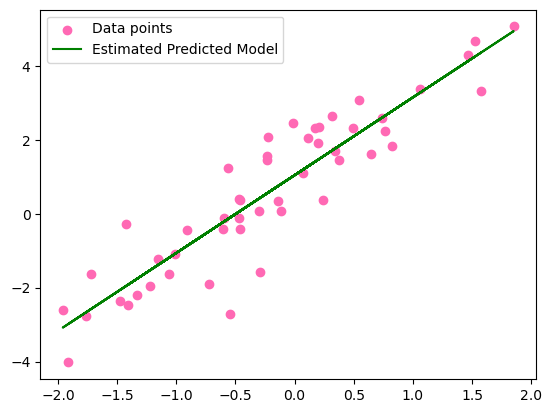

In [62]:
# Use scatter twice, with different "y" inputs
# THe "legend" command creates a box on with the color labels

plt.scatter(x = dataset["x"],y = dataset["y"], color = 'hotpink')
plt.plot(dataset["x"],dataset["p_estimated"], color = 'green')

plt.legend(labels = ["Data points","Estimated Predicted Model"])
plt.show()


<font size = "5">

Try it yourself!
- How good is the estimated fit?
- Create two overlapping lineplots
- $(p \text{ }$ vs $\text{ } x)$ and $(p_{estimated} \text{ }$ vs $\text{ } x)$
- Create a legend to label each plot

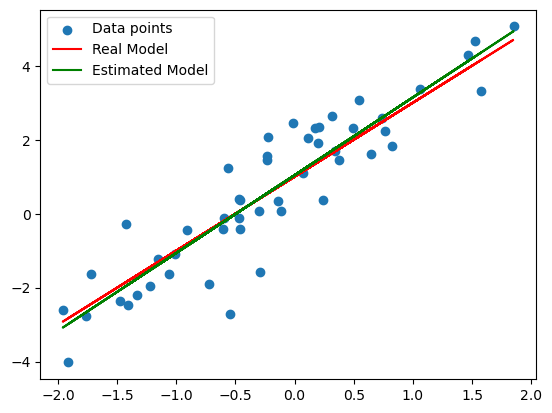

In [65]:
# Write your own code
plt.scatter(x = dataset["x"],y = dataset["y"])
plt.plot(dataset["x"],dataset["p"], color = 'red')
plt.plot(dataset["x"],dataset["p_estimated"], color = 'green')
plt.legend(labels = ["Data points","Real Model","Estimated Model"])

<font size = "5">

Try it youself

- Compute a column with the formula

$\quad$ ``` sample_error = y - p_estimated```

- Create a lambda function <br>

$\quad$ ``` fn_positive_error = lambda error: error >= 0  ```

- Compute a column for whether the error is positive <br>
using ``` .apply()```



In [15]:
# Write your own code


<font size = "5">

Try it yourself

- Compute a new column <br>

```error_sqr = sample_error ** 2```

- Calculate the mean of ```error_sqr```

In [16]:
# Write your own code
